In [3]:
%matplotlib widget
import warnings
import inspect
import IPython.display
from cued_sf2_lab.familiarisation import load_mat_img, plot_image
from my_LP import quantise
from my_DWT import *
from cued_sf2_lab.jpeg import dwtgroup
from huffman import DWT_huffenc, DWT_huffdec
from common import *

In [4]:
lighthouse, _ = load_mat_img(img='lighthouse.mat', img_info='X')
bridge, _ = load_mat_img(img='bridge.mat', img_info='X')
flamingo, _ = load_mat_img(img='flamingo.mat', img_info='X')
lighthouse = lighthouse -  128.0
bridge = bridge - 128.0
flamingo = flamingo - 128.0

In [3]:
N = 7
h1 = np.array([-1, 2, 6, 2, -1])/8
h2 = np.array([-1, 2, -1])/4
g1 = np.array([1, 2, 1])/2
g2 = np.array([-1, -2, 6, -2, -1])/4

qrise = 1
strength = 2

In [5]:
Yq, factors, step = DWT_quant(flamingo, N, h1, h2, g1, g2, qrise = qrise, strength=strength)


256
0 256
1 128
2 64
3 32
4 16
5 8
6 4
AAAA
1.0
1.3877551020408163
1.7755102040816326
2.163265306122449
2.5510204081632653
2.9387755102040813
3.326530612244898
3.7142857142857144
4.1020408163265305
4.489795918367347
4.877551020408163
5.26530612244898
5.653061224489796
6.040816326530612
6.428571428571429
6.816326530612245
7.204081632653061
7.591836734693877
7.979591836734693
8.36734693877551
8.755102040816325
9.142857142857142
9.53061224489796
9.918367346938775
10.306122448979592
10.693877551020408
11.081632653061224
11.46938775510204
11.857142857142858
12.244897959183673
12.63265306122449
13.020408163265305
13.408163265306122
13.795918367346939
14.183673469387754
14.571428571428571
14.959183673469386
15.346938775510203
15.73469387755102
16.122448979591837
16.51020408163265
16.89795918367347
17.285714285714285
17.6734693877551
18.06122448979592
18.448979591836736
18.83673469387755
19.224489795918366
19.612244897959183
20.0
step: 20.0
bananas
apple sauce


### In huffenc, dcbits must be less that 32!

In [7]:
vlc, header = DWT_huffenc(Yq, N, dcbits=12, opthuff=True)

-531
-465
-257
-31
Generating huffcode and ehuf using custom tables
Coding rows (second pass)
Bits for coded image = 62619
Bits for huffman table = 1424


Generating huffcode and ehuf using custom tables
Decoding rows
256
0 256
1 128
2 64
3 32
4 16
5 8
6 4
Error: 9.48


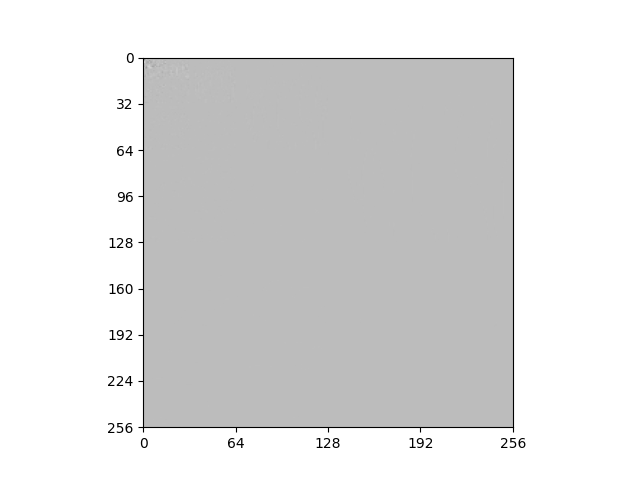

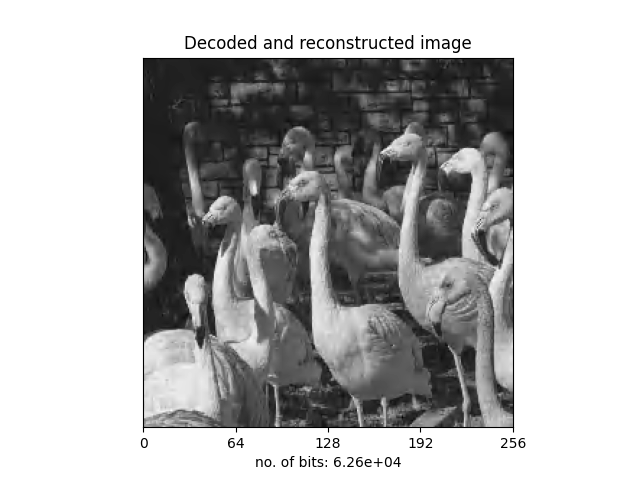

In [9]:

Z = DWT_huffdec(vlc, step, factors, qrise, strength, N, hufftab=header, dcbits=12)
reconstructed = inverse_DWT(Z, N, g1, g2)


fig, axs = plt.subplots()
plot_image(reconstructed, ax=axs)
size_of_img = np.sum(vlc[:, 1])
axs.set(title='Decoded and reconstructed image', yticks=[], xlabel=f'no. of bits: {size_of_img:.2e}')

print("Error:", np.std(reconstructed-flamingo).round(2))

In [3]:
DWT_huffenc(flamingo, N=7, dcbits=8, opthuff=True)

Generating huffcode and ehuf using custom tables
Coding rows (second pass)
Bits for coded image = 528880
Bits for huffman table = 1424


(array([[   2,    8],
        [   0,    1],
        [   2,    7],
        ...,
        [   6,    3],
        [  18,    5],
        [8118,   13]], dtype=int64),
 HuffmanTable(bits=array([  1,   1,   1,   1,   0,   3,   0,   1,   0,   1,   2,   3,   2,
        141,   5,   0]), huffval=array([  7,   6,   5,   4,   2,   3,   8,   1,  20,  21,  22,  18,  19,
         23,   0,  17,   9,  10,  24,  25,  26,  33,  34,  35,  36,  37,
         38,  39,  40,  41,  42,  49,  50,  51,  52,  53,  54,  55,  56,
         57,  58,  65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  81,
         82,  83,  84,  85,  86,  87,  88,  89,  90,  97,  98,  99, 100,
        101, 102, 103, 104, 105, 106, 113, 114, 115, 116, 117, 118, 119,
        120, 121, 122, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138,
        145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 161, 162, 163,
        164, 165, 166, 167, 168, 169, 170, 177, 178, 179, 180, 181, 182,
        183, 184, 185, 186, 193, 194, 195, 196, 197, 198, 19

rms_ref: 8.859943275584582
step: 7.505050505050505
CR: 3.156853026493551
bits: 65686.78950304235
rms: 10.611766255909284
rms_ref: 4.803558992381568
step: 8.919191919191919
CR: 3.0885949557027943
bits: 77830.27239691107
rms: 9.969150810698693
rms_ref: 4.803558992381568
step: 12
CR: 4.069831521104063
bits: 59065.390171449166
rms: 11.782944559568902


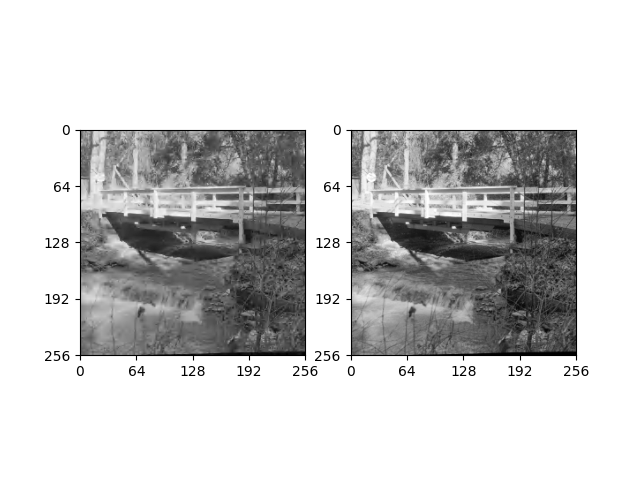

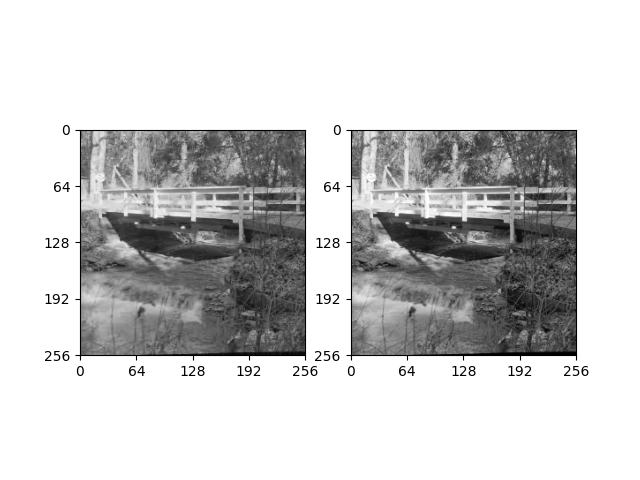

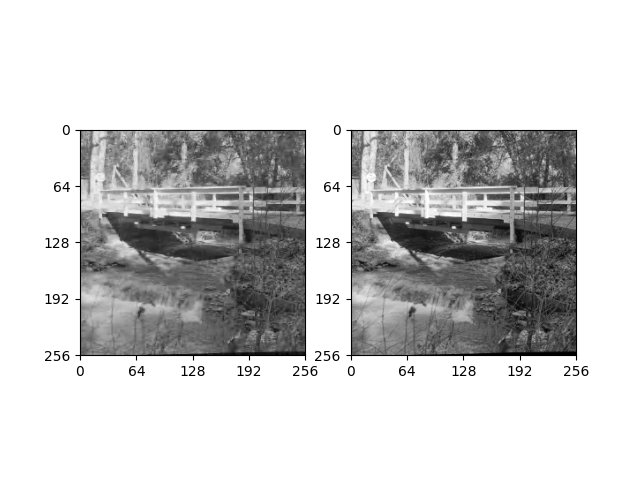

In [4]:
Zb = DWT_analysis(bridge, 7, h1, h2, g1, g2, plot = True, qrise=1.5, strength=0)
Zb = DWT_analysis(bridge, 7, h1, h2, g1, g2, plot = True, qrise=0.2, strength=0.5)
Zb = DWT_analysis(bridge, 7, h1, h2, g1, g2, step = 12, plot = True, qrise=0.2, strength=0.5)

rms_ref: 4.992109372773084
step: 10.191919191919192
CR: 4.508024668248755
bits: 55023.7943557028
rms: 8.918225839678103


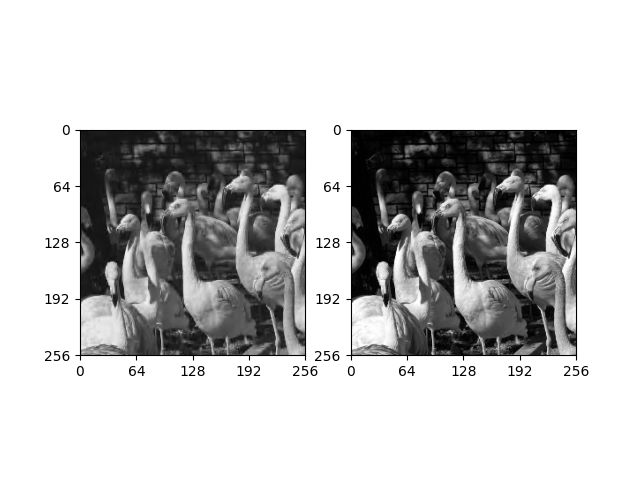

In [5]:
Zf = DWT_analysis(flamingo, 6, h1, h2, g1, g2, plot = True, qrise=0.2, strength=0.3)

In [9]:
from cued_sf2_lab.jpeg import (
    jpegenc, jpegdec, quant1, quant2, huffenc, huffdflt, huffdes, huffgen, runampl, diagscan)